<a href="https://colab.research.google.com/github/Elamraoui-Sohayb/explainable_ai/blob/main/XAI_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# diagnostiquez vos modèles d'apprentissage automatique avec des frameworks d'IA explicables

Dans l'histoire de l'ingénierie et de l'apprentissage automatique, il est essentiel de choisir des modèles transparents interprétables pour les humains ou les utilisateurs finaux. Pratiquement, cela signifie utiliser des sources de données transparentes et des modèles simples et faciles à interpréter comme des modèles linéaires et des arbres de décision ou même des systèmes basés sur des règles malgré leurs limites dues aux scénarios du monde réel où les observations sont non linéaires et très spécifiques. Avec la croissance massive de l'apprentissage automatique et de la popularité du deep learning, la complexité des modèles et la diffusion de l'IA dans tous les domaines, il est devenu crucial de disposer d'approches et de mécanismes pour expliquer les modèles et interpréter des prédictions précises et inexactes.


### **C'est quoi l'Explainable AI (XAI)?**

Explainable AI correspond non seulement à domaine théorique de rechech mais aussi un ensemble d'outils et de frameworks conçus pour  aider à comprendre et à interpréter les prédictions effectuées par les modèles de machine learning. Il permet, entre autres, de résoudre les problèmes de performances de modèles et d'améliorer celles-ci, et aide les usitlisateurs à comprendre leur comportement.

---
# diagnose your Machine Learning models with explainable AI frameworks

In the history of engineering and machine learning, choosing transparent models that are interpretable for humans or end-users is essential. Practically, it means using transparent data sources and simple and easy to interpret models like linear models and decision trees or even rule-based systems despite their limitations due to real-world scenarios where observations are nonlinear and very specific. With the massive growth of machine learning and deep learning popularity, model complexity, and the spread of AI in all fields, it has became crucial to have approaches and mechanisms to explain models and interpret accurate and inaccurate predictions.



In [1]:
# Imports for plotting and data manipulation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
# Imports for modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [2]:
import os 
os.getcwd()

'/content'

In [3]:
data = pd.read_csv('./udemy_courses.csv')

In [4]:
data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [5]:
data.shape

(3678, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [7]:
data["published_month"] = pd.to_datetime(data.published_timestamp).dt.month.astype('object')
data["published_year"] = pd.to_datetime(data.published_timestamp).dt.year.astype('object')
df = data.drop(columns=["course_id", "course_title", "url", "published_timestamp"])

In [8]:
df.sample(n=50, random_state=5)

,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,published_month,published_year
3480,True,50,394,78,22,Beginner Level,1.500000,Web Development,2,2016
2830,False,0,21087,154,24,Beginner Level,3.500000,Web Development,4,2014
2151,True,40,32,3,11,All Levels,1.000000,Musical Instruments,2,2017
148,True,20,2437,12,23,All Levels,1.500000,Business Finance,11,2016
95,False,0,1514,66,11,Beginner Level,0.550000,Business Finance,3,2017
1831,True,20,122,9,11,Beginner Level,0.633333,Musical Instruments,10,2015
982,True,20,176,2,12,Intermediate Level,2.500000,Business Finance,6,2016
2015,True,95,2026,3,62,Intermediate Level,2.500000,Musical Instruments,3,2017
1065,True,20,28,3,14,Expert Level,1.000000,Business Finance,4,2015
812,True,20,978,7,13,Beginner Level,0.533333,Business Finance,1,2016


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


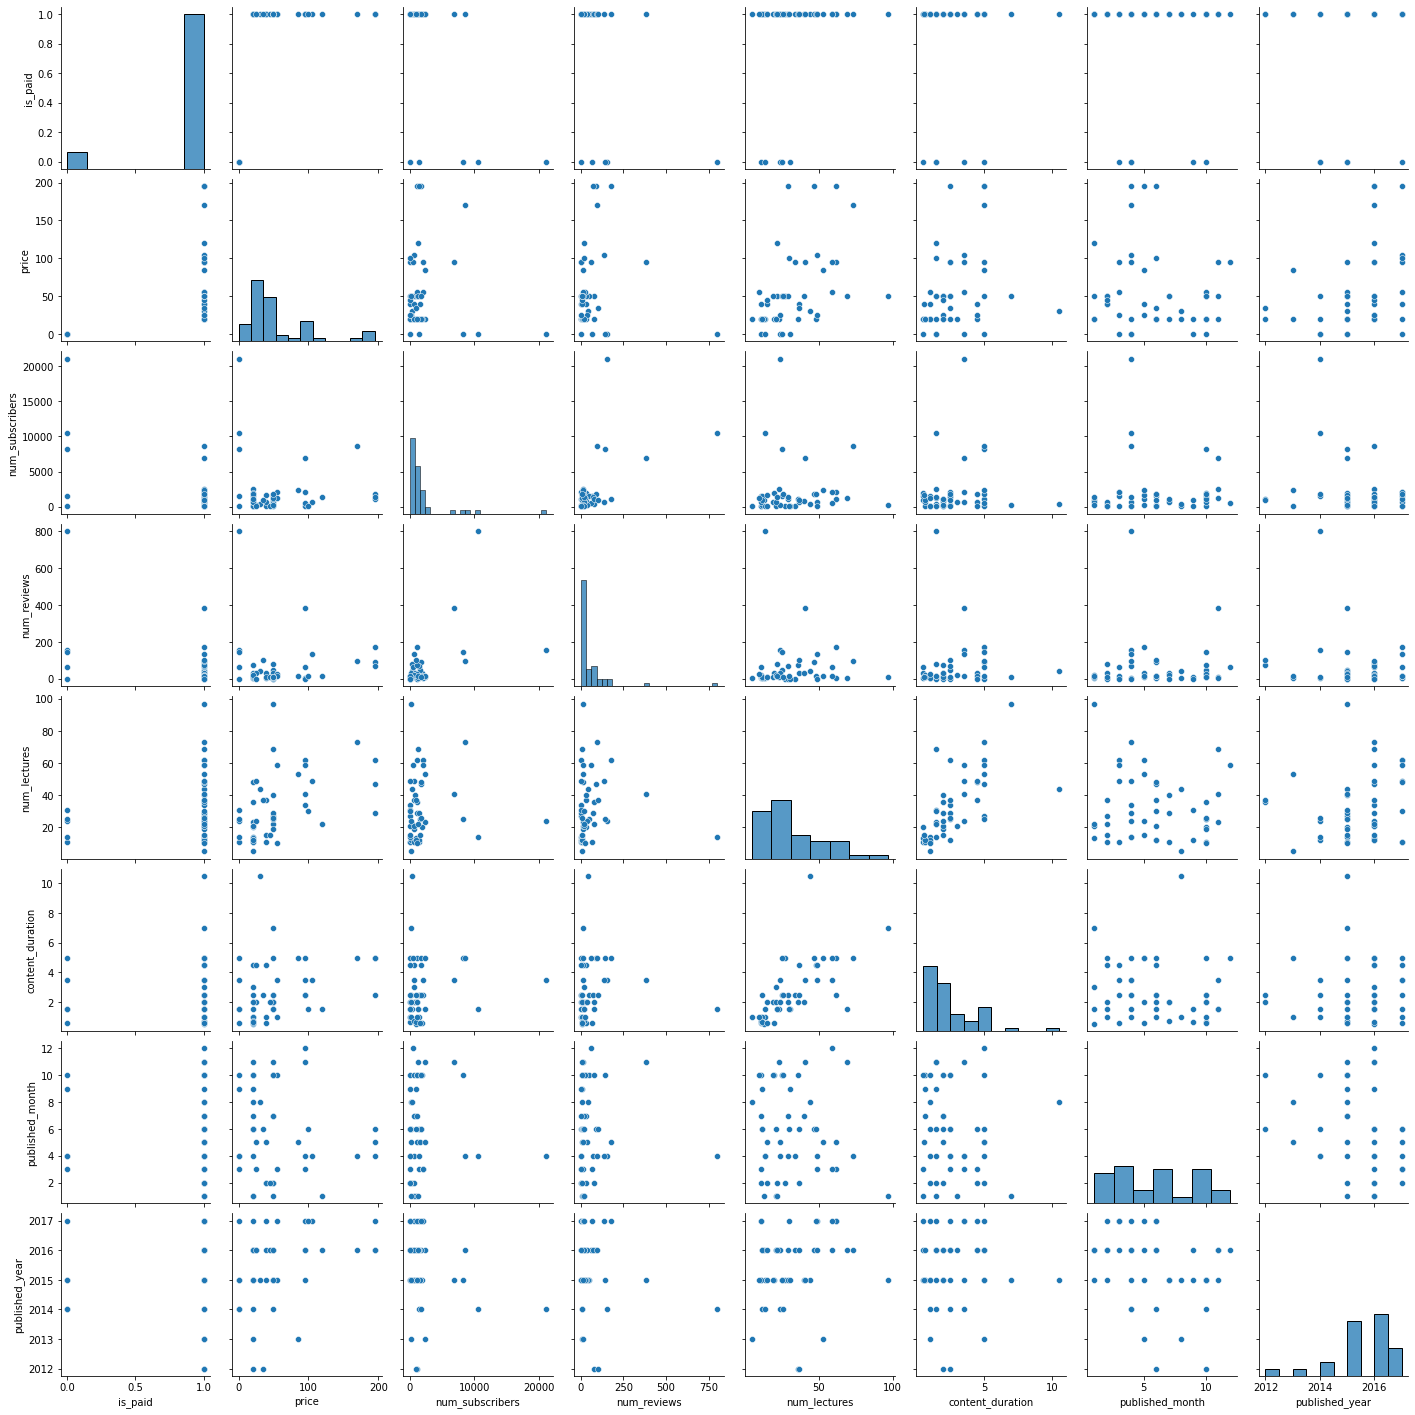

In [9]:
sns.pairplot(df.sample(n=50, random_state=5))
plt.show()

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   is_paid           3678 non-null   bool   
 1   price             3678 non-null   int64  
 2   num_subscribers   3678 non-null   int64  
 3   num_reviews       3678 non-null   int64  
 4   num_lectures      3678 non-null   int64  
 5   level             3678 non-null   object 
 6   content_duration  3678 non-null   float64
 7   subject           3678 non-null   object 
 8   published_month   3678 non-null   object 
 9   published_year    3678 non-null   object 
dtypes: bool(1), float64(1), int64(4), object(4)
memory usage: 262.3+ KB


In [12]:
num_cols = ['price', 'num_reviews', 'num_lectures', 'content_duration', 'published_year', 'published_month']
cat_cols = ['is_paid', 'level', 'subject']
X_data, y_data = df[num_cols].merge(pd.get_dummies(df[cat_cols], drop_first=True ), left_index=True, right_index=True), df['num_subscribers']

In [13]:
X_train, X_test,  y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
col_names = X_train.columns
X_train.shape

(2942, 13)

In [14]:
scaler = MinMaxScaler()
scaler = scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape

(2942, 13)

In [15]:
X_train

array([[1.00000000e+00, 6.08489707e-03, 2.43902439e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e-01, 1.23884132e-03, 1.66880616e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [5.50000000e-01, 3.09710330e-02, 1.46341463e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [2.50000000e-01, 4.37238113e-04, 3.33761232e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.16232465e-02, 3.20924262e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e-01, 1.85826198e-03, 9.49935815e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [25]:

model = RandomForestRegressor(n_estimators=500, random_state=42)

model.fit(X_train, y_train)
y_train_preds = model.predict(X_train)
print("Mean Squared Error on training data is: {:.2f}".format(mean_squared_error(y_train_preds, y_train)))
y_pred = model.predict(X_test)
print("Mean Squared Error on testing data is: {:.2f}".format(mean_squared_error(y_pred, y_test)))


Mean Squared Error on training data is: 6123060.08
Mean Squared Error on testing data is: 12003940.58


In [17]:
df_feature_importance = pd.DataFrame(model.feature_importances_, index=col_names, columns=['feature importance']).sort_values('feature importance', ascending=False)
df_feature_importance

,feature importance
num_reviews,0.669889
published_year,0.112155
published_month,0.053436
price,0.047898
num_lectures,0.045838
content_duration,0.032147
is_paid,0.016714
subject_Web Development,0.008568
level_Beginner Level,0.006630
subject_Musical Instruments,0.003609


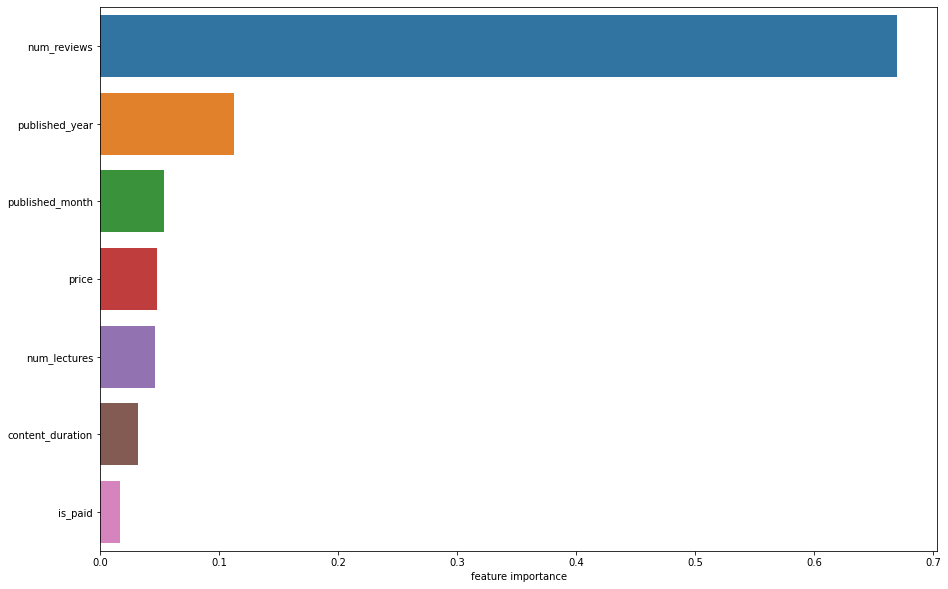

In [20]:
fig, _ = plt.subplots(figsize=(15,10))
sns.barplot(x = df_feature_importance["feature importance"][:7], y = df_feature_importance.index[:7], orient='h')

In [45]:
# Hyperparameters tuning
n_estimators = [int(x) for x in np.linspace(100, 500, num = 5)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(1, 30, num = 20)]
max_depth.append(None)
min_samples_split = [2, 3, 4, 5, 8]
min_samples_leaf = [1, 2, 3, 4, 5]
bootstrap = [True, False]
warm_start = [True, False]
random_grid = {'n_estimators' : n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap, 
               'warm_start': warm_start}

In [46]:
model = RandomForestRegressor(random_state=42, verbose = 1)
random_search = RandomizedSearchCV(model, param_distributions=random_grid, cv = 3, n_iter=1000, n_jobs=-1, random_state=42, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    4.5s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [47]:
random_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=3, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=42, verbose=1, warm_start=False)

In [48]:
# Best Model evaluation

model = random_search.best_estimator_

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#y_test_prob = model.predict_proba(X_test)[:,1]
print("Mean Squared Error on training data is: {:.2f}".format(mean_squared_error(y_train_pred, y_train)))
print("Mean Squared Error on testing data is: {:.2f}".format(mean_squared_error(y_test_pred, y_test)))


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Mean Squared Error on training data is: 19585969.73
Mean Squared Error on testing data is: 11376549.29


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


In [51]:
!pip install shap

     |████████████████████████████████| 358kB 6.5MB/s 
  Created wheel for shap: filename=shap-0.38.1-cp36-cp36m-linux_x86_64.whl size=489402 sha256=917392d1afbef87a546b3febca10ff8db50660a628c90865f9ab356b9a02b6e7
  Stored in directory: /root/.cache/pip/wheels/a8/fb/e4/88012be41842b9be62ae18d82d1b1e880daf8539d1fef1fa00
Successfully built shap


In [50]:
import shap 
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

ModuleNotFoundError: ignored

In [ ]:
shap.summary_plot(shap_values[1], X_test, plot_type="bar")

In [ ]:
#We can use a `summary_plot` to plot our Shapely Values for class `1`
shap.summary_plot(shap_values[1], X_test)

In [ ]:
shap.dependence_plot('ca', shap_values[1], X_test, interaction_index=None)

In [ ]:
shap.dependence_plot('ca', shap_values[1], X_test)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test)

In [ ]:
#Get indexes for a Group of Points
sample_test_idx = X_test.index.get_indexer_for(X_test.sample(10).index)

#To highlight False Negatives from these points
FN = (y_test_pred[sample_test_idx] == 0) &\
     (y_test.iloc[sample_test_idx] == 1).to_numpy() 
#Set the expected value for the positive class
expected_value = explainer.expected_value[1]

#Reset matplotlib style so trat it's not seaborn's
# sns.reset_orig()
# plt.rcParams.update(orig_plt_params)

#Display decision plot with FN highlighted
shap.decision_plot(expected_value, shap_values[1][sample_test_idx],\
                   X_test.iloc[sample_test_idx], highlight=FN)

In [ ]:
#positive case with heart disease
shap.force_plot(expected_value, shap_values[1][X_test.index==126],\
                X_test[X_test.index==126])

In [ ]:
#negative case without heart disease
shap.force_plot(expected_value, shap_values[1][X_test.index==184],\
                X_test[X_test.index==184])

In [ ]:
import lime
from lime.lime_tabular import LimeTabularExplainer

explainer = lime.lime_tabular.LimeTabularExplainer(X_test.values,\
                        feature_names=X_test.columns, \
                        class_names=['Not Heart Disease', 'Heart Disease'])

In [ ]:
#positive case with heart disease
explainer.explain_instance(X_test[X_test.index==10].values[0],\
                                    model.predict_proba, num_features=6).\
                                    show_in_notebook(predict_proba=True)

In [ ]:
# negative case without heart disease
explainer.explain_instance(X_test[X_test.index==219].values[0],\
                                    model.predict_proba, num_features=6).\
                                    show_in_notebook(predict_proba=True)